In [1]:
from Models import Perceptron
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('linear.csv')
df

,0,1,y
0,8.767747,3.995108,0
1,5.938750,5.387562,0
2,8.605291,-2.652032,1
3,7.488204,5.810372,0
4,7.653939,4.499167,0
...,...,...,...
995,7.211895,7.904023,0
996,8.974970,-3.063078,1
997,7.324660,6.607004,0
998,6.889562,4.775597,0


In [3]:
train_df = df.sample(frac=0.8)      # also shuffles
test_df = df.drop(train_df.index)   # also shuffles


train_df, test_df

(            0         1  y
 164  6.051324 -1.389240  1
 931  8.179189  7.392634  0
 39   7.190766 -2.702650  1
 603  7.943937  5.188961  0
 438  8.564848  5.403795  0
 ..        ...       ... ..
 444  7.735802 -3.578637  1
 412  8.809382  4.863894  0
 200  7.514772  5.014704  0
 522  6.432855 -2.672185  1
 116  9.319374 -1.670430  1
 
 [800 rows x 3 columns],
             0         1  y
 3    7.488204  5.810372  0
 5    8.613068 -2.578820  1
 6    7.326831  5.901168  0
 8    7.821450 -1.686046  1
 19   7.393322  4.492761  0
 ..        ...       ... ..
 984  6.785866  6.357066  0
 989  9.453885 -2.331332  1
 990  6.156462  6.109125  0
 993  7.098063 -2.228558  1
 996  8.974970 -3.063078  1
 
 [200 rows x 3 columns])

In [4]:
train_inputs = train_df[['0', '1']].values
train_labels = train_df['y'].values

test_inputs = test_df[['0', '1']].values
test_labels = test_df['y'].values

In [5]:
model = Perceptron(input_size=2)

In [6]:
model.train(train_inputs, train_labels, epochs=10, learning_rate=10)

Epoch: 0, Error: 11
Epoch: 1, Error: 0
Epoch: 2, Error: 0
Epoch: 3, Error: 0
Epoch: 4, Error: 0
Epoch: 5, Error: 0
Epoch: 6, Error: 0
Epoch: 7, Error: 0
Epoch: 8, Error: 0
Epoch: 9, Error: 0
[  51.62132891 -252.78984392]


In [7]:
predicted = model.predict(test_inputs)
print("Error:", np.count_nonzero(predicted - test_labels))

Error: 0


10 [  51.62132891 -252.78984392]


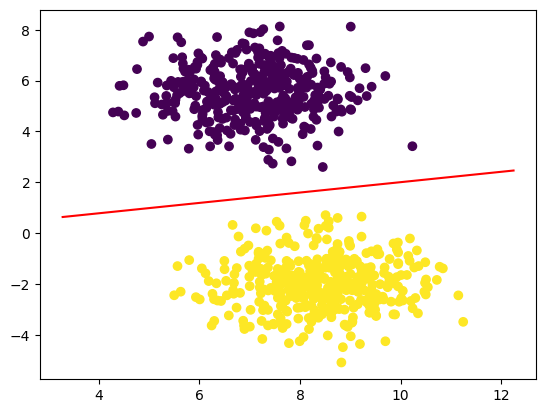

In [15]:
# visualize results
plt.scatter(train_inputs[:,0], train_inputs[:,1], c=train_labels)
x = np.linspace(train_inputs[:,0].min() - 1, train_inputs[:,0].max() + 1, 100)
# print(x)
y = [-model._weights[0] * i + model._bias for i in x] / model._weights[1]
print(model._bias, model._weights)
plt.plot(x, y, '-r')
plt.show()